## Single Neuron Logistic Regression

Single Neuron Logistic Regression, often referred to as Logistic Regression when implemented using a single neuron, is a widely used statistical method in machine learning for binary classification. Unlike linear regression that predicts a continuous outcome, logistic regression is used for problems where the outcome is categorical, typically where the output is binary (e.g., Yes/No, True/False, 0/1).

### Concept
Logistic Regression models the probability that an input belongs to a particular category. It's similar to linear regression in terms of using weights for input features but differs in its output and the function used to get there. The core elements include:

**Inputs:** These are the features or independent variables used to predict the output.

**Weights:** Each input feature is assigned a weight. These weights determine the influence of each input on the prediction.

**Bias:** A bias term is added to the model, allowing adjustment to the output independently of the input values.

**Sigmoid Function:** This is the key to logistic regression. The linear combination of weights and inputs is passed through a sigmoid (logistic) function, which maps any real-valued number into a value between 0 and 1. This value is interpreted as the probability of the input being in a particular class.

### Mathematical Representation
The logistic regression model using a single neuron can be represented as follows:

1. **Linear Combination:** First, a linear combination of the inputs and weights is computed, similar to linear regression.

   \\[ z = w_1x_1 + w_2x_2 + ... + w_nx_n + b \\]

2. **Sigmoid Function:** The linear combination is then passed through a sigmoid function.

   \\[ \sigma(z) = \frac{1}{1 + e^{-z}} \\]

   Here, \\( \sigma(z) \\) is the sigmoid function, and it outputs a value between 0 and 1.

3. **Output Interpretation:** The output of the sigmoid function is interpreted as the probability of the input belonging to the positive class (usually labeled as "1"). 


### Training the Model
Training a logistic regression model involves finding the weights and bias that minimize a loss function, typically the binary cross-entropy (also known as log loss), which measures the distance between the model's predictions and the actual outcomes.



## Application

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Load the data
df = pd.read_csv("Cancer_Detection.csv")


In [3]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


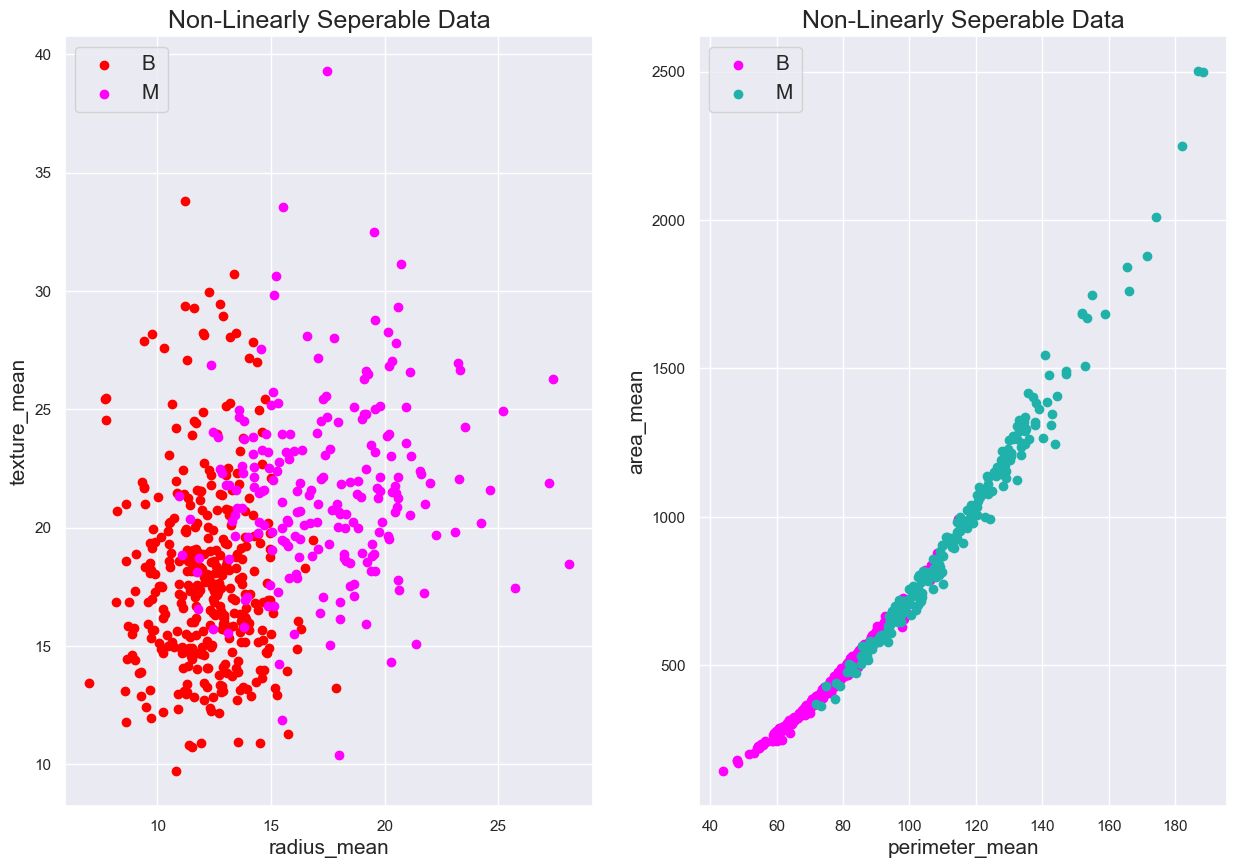

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
B = df[df.diagnosis == "B"]
M = df[df.diagnosis == "M"]
ax1.scatter(B.radius_mean, 
            B.texture_mean, 
            color = "red", 
            label = "B")
ax1.scatter(M.radius_mean, 
            M.texture_mean, 
            color = "magenta", 
            label = "M")
ax1.set_xlabel("radius_mean", fontsize = 15)
ax1.set_ylabel("texture_mean", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Non-Linearly Seperable Data", fontsize = 18)

ax2.scatter(B.perimeter_mean, 
            B.area_mean, 
            color = "magenta", 
            label = "B")
ax2.scatter(M.perimeter_mean, 
            M.area_mean, 
            color = "lightseagreen", 
            label = "M")
ax2.set_xlabel("perimeter_mean", fontsize = 15)
ax2.set_ylabel("area_mean", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

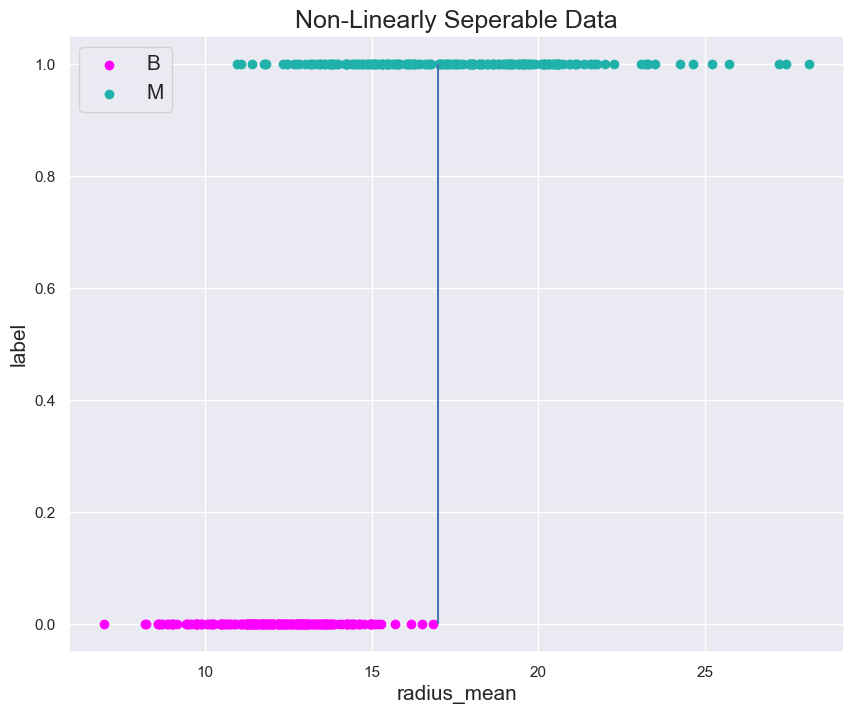

In [22]:
plt.figure(figsize = (10, 8))
num_points = min(len(B.radius_mean), len(M.radius_mean))
plt.scatter(B.radius_mean[:num_points], 
            np.zeros(num_points), 
            color = "magenta", 
            label = "B")
plt.scatter(M.radius_mean[:num_points], 
            np.ones(num_points), 
            color = "lightseagreen", 
            label = "M")
plt.vlines(17, 0.0, 1.0)
plt.xlabel("radius_mean", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()


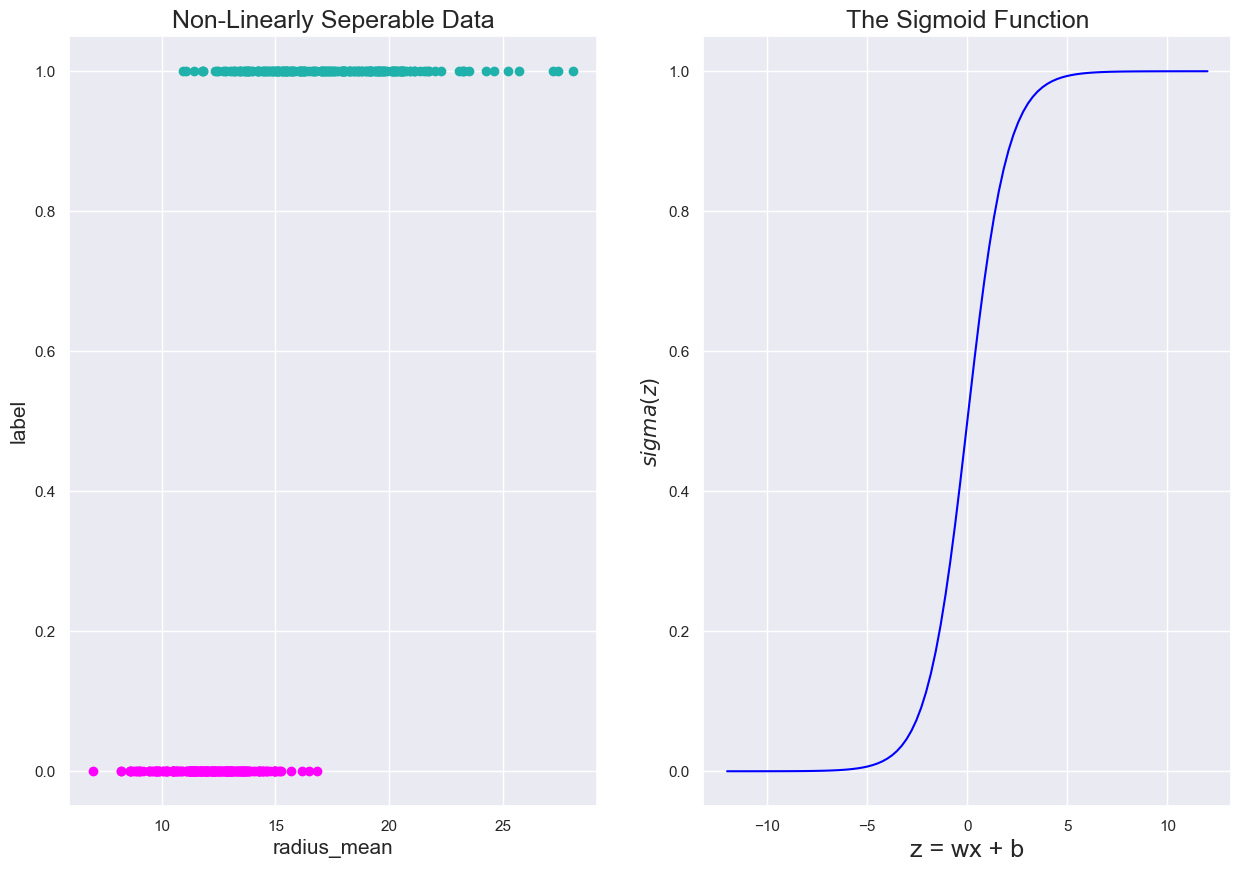

In [21]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

num_points = min(len(B.radius_mean), len(M.radius_mean))
ax1.scatter(B.radius_mean[:num_points], 
            np.zeros(num_points), 
            color = "magenta", 
            label = "B")
ax1.scatter(M.radius_mean[:num_points], 
            np.ones(num_points), 
            color = "lightseagreen", 
            label = "M")
ax1.set_xlabel("radius_mean", fontsize = 15)
ax1.set_ylabel("label", fontsize = 15)
ax1.set_title("Non-Linearly Seperable Data", fontsize = 18)


domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 18)
ax2.set_ylabel("$sigma(z)$", fontsize = 15)
ax2.set_title("The Sigmoid Function", fontsize = 18)
plt.show()


In [23]:
class SingleNeuron(object):
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()
    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

In [38]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

node = SingleNeuron(sigmoid, cross_entropy_loss)

X = df.iloc[50:].radius_mean.values
X = X.reshape(-1, 1)
y = np.where(df.iloc[50:].diagnosis == "B", 0, 1)

node.train(X, y, alpha = 0.01, epochs = 10_000)

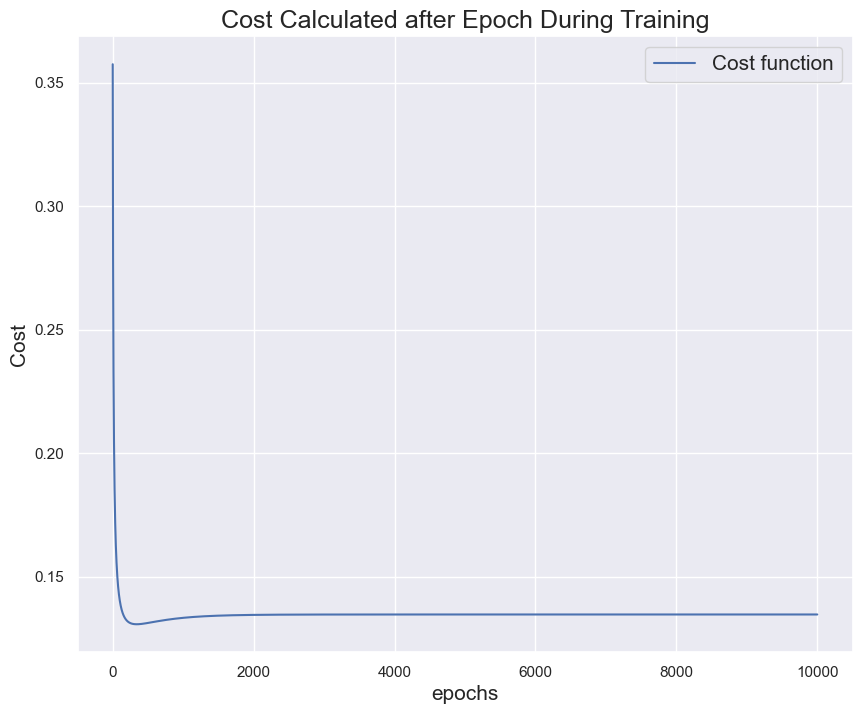

In [39]:
node.plot_cost_function()
plt.show()

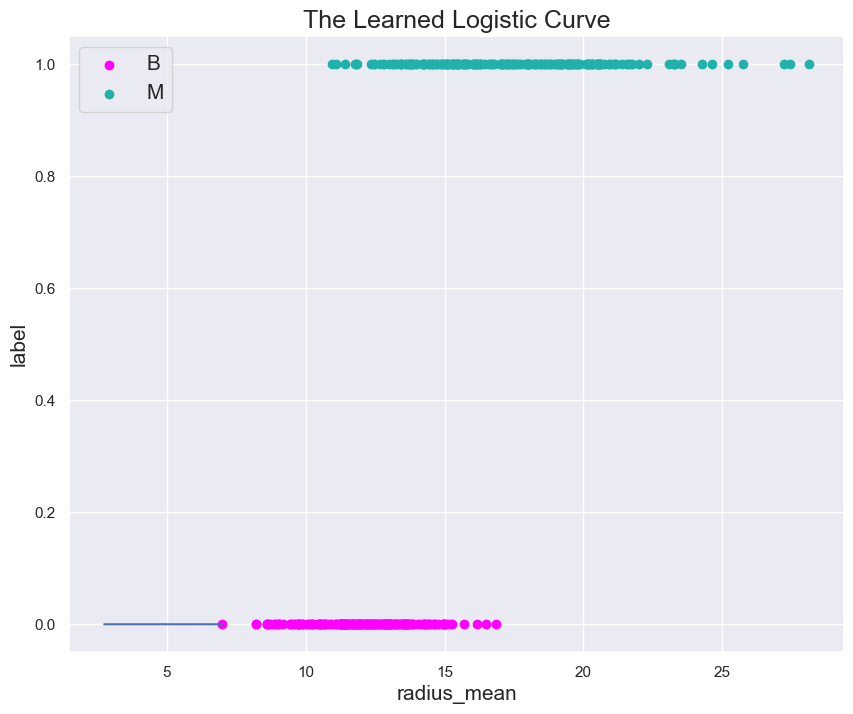

In [47]:
plt.figure(figsize = (10, 8))
num_points = min(len(B.radius_mean), len(M.radius_mean))
plt.scatter(B.radius_mean[:num_points], 
            np.zeros(num_points), 
            color = "magenta", 
            label = "B")
plt.scatter(M.radius_mean[:num_points], 
            np.ones(num_points), 
            color = "lightseagreen", 
            label = "M")
#domain = np.linspace(2.75, 7, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("radius_mean", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

In [42]:
node.predict(X)

array([9.69711014e-03, 1.47348891e-01, 1.27255682e-02, 9.94716189e-01,
       6.16277138e-01, 6.74191145e-03, 9.98829876e-01, 4.69605516e-01,
       6.55932990e-02, 8.07712148e-05, 8.63193788e-04, 7.83420427e-05,
       3.04890307e-01, 1.88474219e-04, 3.83681583e-02, 4.96289404e-01,
       2.94335428e-04, 4.90148673e-03, 1.51278113e-04, 4.44165314e-02,
       9.98233879e-01, 1.21979327e-04, 9.75405665e-01, 1.80755417e-01,
       2.21749108e-02, 8.75980175e-01, 1.27470668e-01, 9.93160863e-01,
       9.99733695e-01, 4.98995526e-02, 6.06261837e-03, 9.85333995e-02,
       9.99999879e-01, 9.98616165e-01, 1.39295022e-02, 9.96331415e-01,
       3.83924686e-01, 9.98436646e-01, 2.38921621e-02, 4.43094279e-01,
       4.35572159e-01, 7.08074013e-01, 8.94382892e-02, 1.14491173e-01,
       6.01734830e-01, 9.99764309e-01, 1.82553921e-02, 4.81162877e-04,
       7.61121339e-03, 3.62497910e-01, 1.41686168e-01, 6.63331085e-06,
       1.82553921e-02, 5.51164279e-04, 1.40629566e-03, 7.14370051e-02,
      

In [43]:
np.rint(node.predict(X)) != y

array([False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False,

In [44]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.1001926782273603


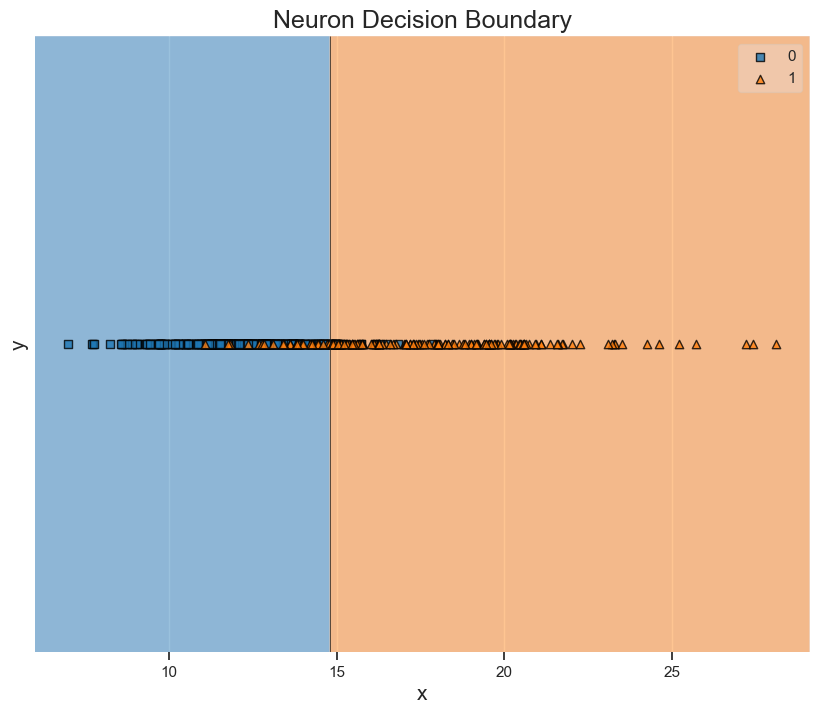

In [45]:
node.plot_decision_boundary(X, y)
plt.show()

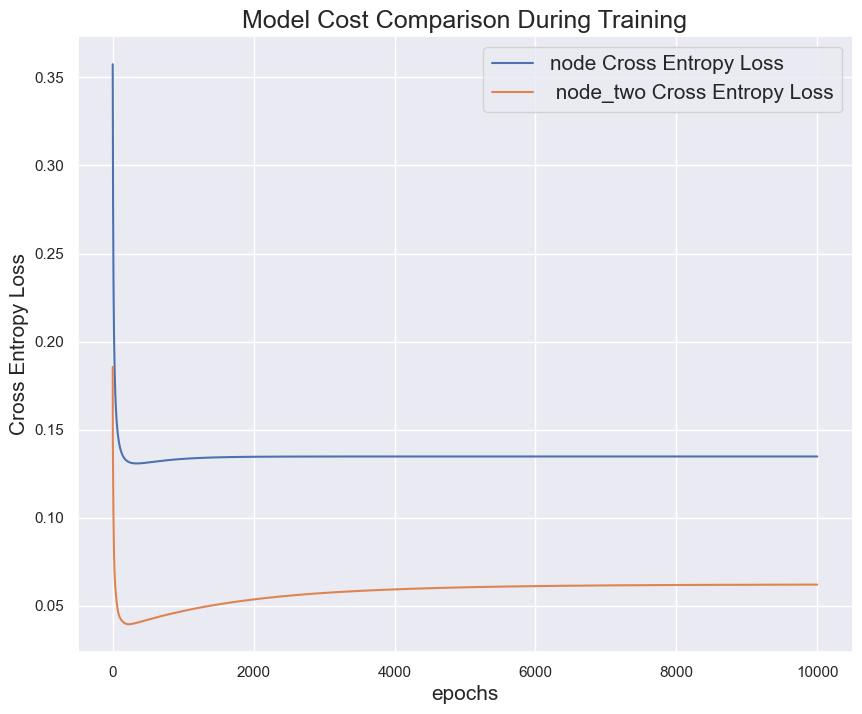

In [46]:
# Instantiate a new single neuron.
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_two = df.iloc[50:][["radius_mean", "texture_mean"]].values

# Train the new single neuron model on the new feature vectors.
node_two.train(X_two, y, alpha = 0.01, epochs = 10_000)


plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         label = "node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_,
         label = " node_two Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)


plt.show()